Implemente un enfoque de modelado multiescala concurrente en Python para simular el flujo de agua a través de
una formación rocosa porosa. Utilice tanto un modelo macroscópico (ley de Darcy) como un modelo microscópico
(ecuaciones de Navier-Stokes) para describir el flujo. Considere los siguientes pasos propuestos

1. Cree una función que simule el flujo de agua utilizando la ley de Darcy en la macroescala.

In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# Definimos nuestras funciones de simulación
def darcy_flow(K,A,h1,h2,L):
    Q = -K * A * (h2 - h1) / L
    return Q

2. Cree una función que simule el flujo de agua utilizando las ecuaciones de Navier-Stokes a escala
microscópica.

In [78]:
def navier_stokes(rho, u, p, mu, f, dt, dx, dy):
    # Dimensiones de la matriz u
    Nx, Ny = u.shape

    # Calcular derivadas
    Du_Dt = np.zeros((Nx, Ny))
    u_Del_u = np.zeros((Nx, Ny))
    Del_p = np.zeros((Nx, Ny))
    mu_Del2_u = np.zeros((Nx, Ny))

    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            Du_Dt[i, j] = (u[i - 1, j] - u[i + 1, j]) / (2.0 * dt)
            u_Del_u[i, j] = u[i, j] * ((u[i, j] - u[i, j - 1]) / dx + (u[i, j + 1] - u[i, j - 1]) / (2.0 * dy))
            Del_p[i, j] = ((p[i - 1, j] - 2 * p[i, j] + p[i + 1, j]) / dx**2 + (p[i, j - 1] - 2 * p[i, j] + p[i, j + 1]) / dy**2)
            mu_Del2_u[i, j] = mu * ((u[i - 1, j] - 2 * u[i, j] + u[i + 1, j]) / dx**2 + (u[i, j - 1] - 2 * u[i, j] + u[i, j + 1]) / dy**2)

    # Calcula el nuevo campo de velocidad
    u_new = rho * (Du_Dt + u_Del_u) - Del_p + mu_Del2_u + f

    return u_new


3. Implementar un enfoque multiescala concurrente donde el modelo macroscópico influya en el modelo
microscópico y viceversa.

In [79]:
def multiscale_model(K,A,h1,h2,L,rho, u, p, mu, f, dt, dx, dy):
    # Paso 1: Macroescala (Darcy)
    Q_darcy = darcy_flow(K,A,h1,h2,L)

    # Ajuste para el paso 2
    # Supongamos que Q_darcy afecta a f en las ecuaciones de Navier-Stokes
    f += Q_darcy

    # Paso 2: Microescala (Navier-Stokes)
    u_new = navier_stokes(rho, u, p, mu, f, dt, dx, dy)

    # Criterio de convergencia
    while np.max(np.abs(u_new - u)) > 1e-6:
        u = u_new
        Q_darcy = darcy_flow(K,A,h1,h2,L)
        f += Q_darcy
        u_new = navier_stokes(rho, u, p, mu, f, dt, dx, dy)

    return u_new


4. Visualice el flujo de agua a través de la formación rocosa a lo largo del tiempo.

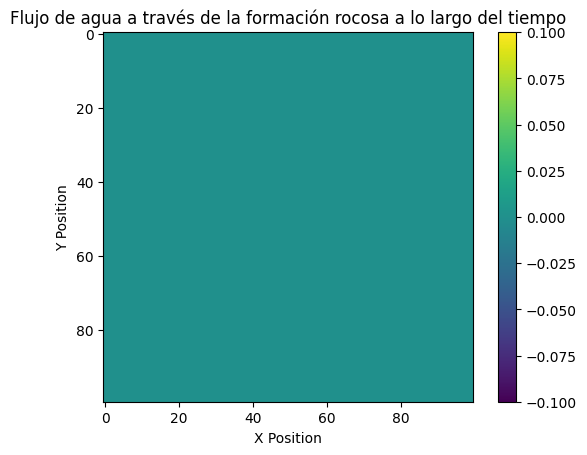

In [83]:
# Parámetros de muestra
K = 1  # Conductividad hidráulica
A = 1  # Área de sección transversal
h1 = 1  # Altura inicial del agua
h2 = 2  # Altura final del agua
L = 1  # Longitud del segmento de formación rocosa
rho = 1000  # Densidad del agua
u = np.zeros((100,100))  # Velocidad del agua
p = np.ones((100,100))  # Presión del agua
mu = 0.001  # Viscosidad del agua
f = np.ones((100,100))  # Fuerzas externas en el agua
dt = 0.01  # Paso de tiempo
dx = 0.01  # Paso de espacio en la dirección x
dy = 0.01  # Paso de espacio en la dirección y

# Llamada a la función
u_new = multiscale_model(K,A,h1,h2,L,rho, u, p, mu, f, dt, dx, dy)

def visualize_flow(u):
    plt.imshow(u, cmap='viridis')
    plt.colorbar()
    plt.title("Flujo de agua a través de la formación rocosa a lo largo del tiempo")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.show()

# Visualización del resultado
visualize_flow(u_new)

Responda:

a. ¿En qué se diferencia el enfoque multiescala concurrente del enfoque multiescala secuencial?

La multiescala secuencial aborda las escalas una tras otra, con interacciones que ocurren en pasos separados, lo que puede ser eficiente pero menos preciso. Por otro lado, la multiescala concurrente resuelve simultáneamente las escalas y permite interacciones en tiempo real, proporcionando resultados más precisos a expensas de un mayor uso de recursos computacionales. La elección entre estos enfoques depende de la importancia de las interacciones entre escalas y los recursos disponibles en un problema de modelización específico.

b. ¿Qué información del modelo macroscópico se pasa al modelo microscópico y cómo afecta a la
simulación microscópica?

La información del modelo macroscópico se transmite al modelo microscópico mediante la imposición de condiciones de contorno, ajuste de parámetros, introducción de fuentes o sumideros, o cambios en las propiedades de transporte. Esta información influye en la simulación microscópica al modificar las condiciones iniciales y de contorno, los parámetros del modelo y otros aspectos del problema. La interacción entre las escalas permite capturar efectos que no se pueden representar adecuadamente en un solo modelo de escala, lo que mejora la precisión y la capacidad de representación de sistemas complejos que involucran múltiples escalas espaciales o temporales.

c. ¿Cuáles son las ventajas de utilizar modelado multiescala concurrente en este escenario?

El modelado multiescala concurrente es ventajoso en situaciones donde se requiere una representación precisa y dinámica de las interacciones entre escalas, especialmente en problemas complejos donde las relaciones entre las escalas son críticas para la comprensión del sistema. 